In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files 
uploaded= files.upload () 

Saving UserKnowledgeModeling.csv to UserKnowledgeModeling (1).csv


In [3]:
data=pd.read_csv("UserKnowledgeModeling.csv")
data["UNS"]=data["UNS"].replace("Very Low","very_low")

# **DATA**

Se extrae de la tesis Doctoral estudiada un conjunto datos reales sobre el estado de los conocimientos de los estudiantes sobre el tema de las máquinas eléctricas de corriente continua. En este se encuentran las siguientes variables:

*   STG (El grado de tiempo de estudio para las materias del objeto de la meta),
*   SCG (El grado de repetición del usuario para las materias del objeto de la meta)
*   STR (El grado de tiempo de estudio del usuario para los objetos relacionados con el objeto de la meta)
*   LPR (El rendimiento en el examen del usuario para los objetos relacionados con el objeto de la meta)
*   PEG (El rendimiento en el examen del usuario para los objetos de la meta)
*   UNS (El nivel de conocimiento del usuario)


In [4]:
data.head(5)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,very_low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High


In [5]:
Niveles=pd.DataFrame(data["UNS"].value_counts())

In [6]:
Niveles

,UNS
Low,129
Middle,122
High,102
very_low,50


In [7]:
data["UNS"]=data["UNS"].replace("very_low",0)
data["UNS"]=data["UNS"].replace("very low",0)
data["UNS"]=data["UNS"].replace("Low",1)
data["UNS"]=data["UNS"].replace("Middle",2)
data["UNS"]=data["UNS"].replace("High",3)
#.....
data.head(5)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,0
1,0.05,0.05,0.55,0.60,0.14,1
2,0.08,0.18,0.63,0.60,0.85,3
3,0.20,0.20,0.68,0.67,0.85,3
4,0.22,0.22,0.90,0.30,0.90,3


Para mejor comprensión se transforman los niveles para convertirlos en meros enteros, quedando: 
*   very_low = 0
*   Low	     = 1
*   Middle	 = 2
*   High	   = 3


In [8]:
## Algunos estadísticos descriptivos..
data.describe()

,STG,SCG,STR,LPR,PEG,UNS
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360,1.684864
std,0.212018,0.215531,0.246684,0.257545,0.266775,0.986195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000,1.000000
50%,0.300000,0.300000,0.440000,0.330000,0.400000,2.000000
75%,0.480000,0.510000,0.680000,0.650000,0.660000,3.000000
max,0.990000,0.900000,0.950000,0.990000,0.990000,3.000000


In [9]:
data0=data[["STG",	"SCG",	"STR", "LPR",	"PEG"]]
data0.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.10,0.50,0.26,0.05
1,0.05,0.05,0.55,0.60,0.14
2,0.08,0.18,0.63,0.60,0.85
3,0.20,0.20,0.68,0.67,0.85
4,0.22,0.22,0.90,0.30,0.90


<function matplotlib.pyplot.show>

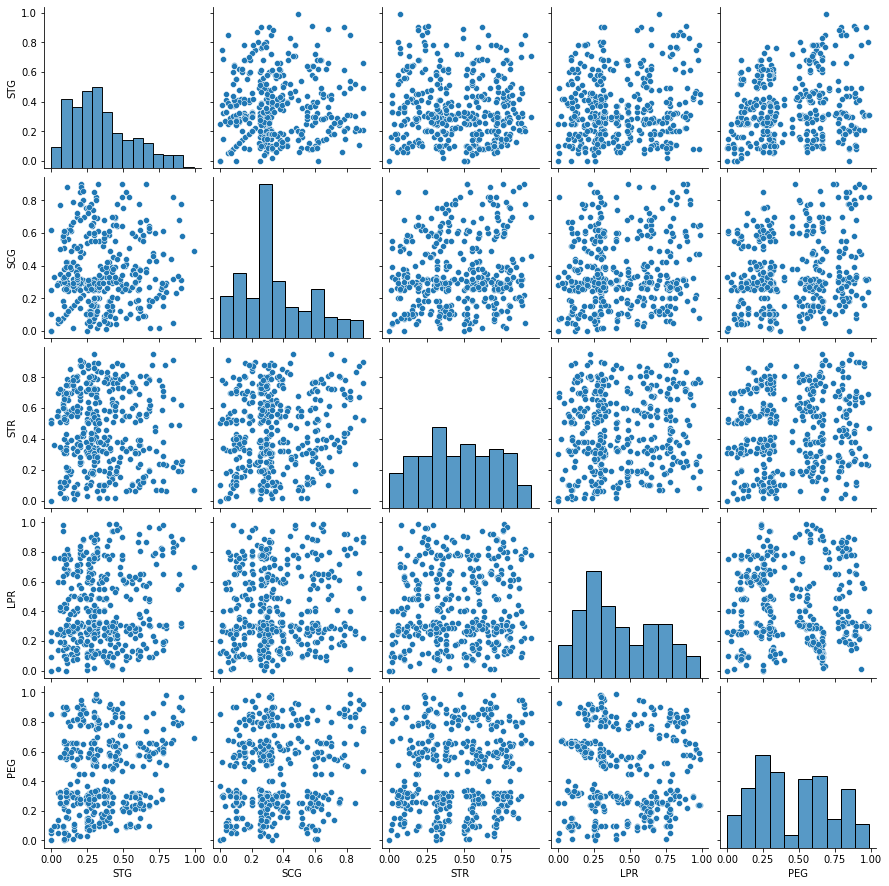

In [10]:
sns.pairplot(data0, aspect=1)
plt.show

## PRIMERA VISTA DE LOS CLUSTERS

Se compara mediante gráfico de dispersión  la relación existente entre cada par de variables para determinar a una primera vista la presencia de clusters. Se decide estudiar la pareja  que representa las variables LPR y PEG

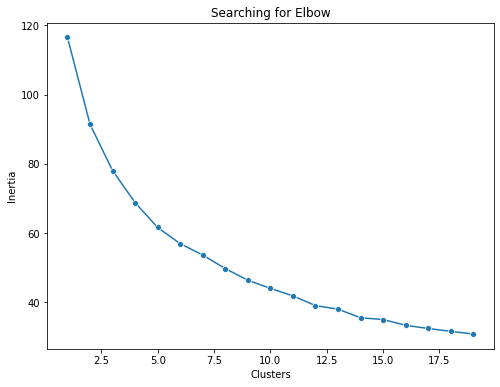

In [11]:
from sklearn.cluster import KMeans  ##llamo el almgoritmode Machin learning KMeans Vecinos medios

clusters = []
for i in range(1, 20):
    km = KMeans(n_clusters=i).fit(data0)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 20)), y=clusters, ax=ax, marker="o") #Marker Marcadores
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()  #La grafica mide la inercia de cada cluster es decir la capacidad de rotación. El punto de inlflexion nos dice más o menos ls cluster requeridos

# ¿CUANTOS CLUSTERS?

Determinamos mediante el método del codo si hay cambios de inercia mediante la gráfica, es decir buscamos el punto de inflexión, el cual se puede apreciar que está entre 4 a 6 clusters para posteriormente aplicar los algoritmos de Machin Learnig en este caso de problemas estudiados.  

# APLICANDO CLUSTER KMEANS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


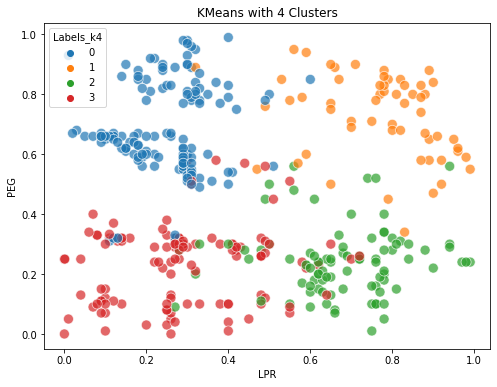

In [12]:
# 4 cluster
km4 = KMeans(n_clusters=4).fit(data0)
data['Labels_k4'] = km4.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k4'], palette=sns.color_palette('tab10', 4), s=100, alpha=0.7)# se compara LPR   y PEG
plt.title('KMeans with 4 Clusters')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


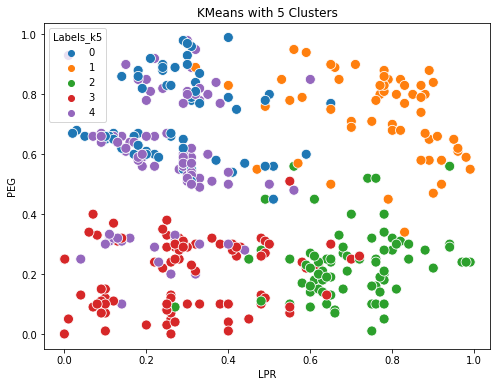

In [13]:
# 5 cluster
km4 = KMeans(n_clusters=5).fit(data0)
data['Labels_k5'] = km4.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k5'], palette=sns.color_palette('tab10', 5), s=100)# se compara LPR   y PEG
plt.title('KMeans with 5 Clusters')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


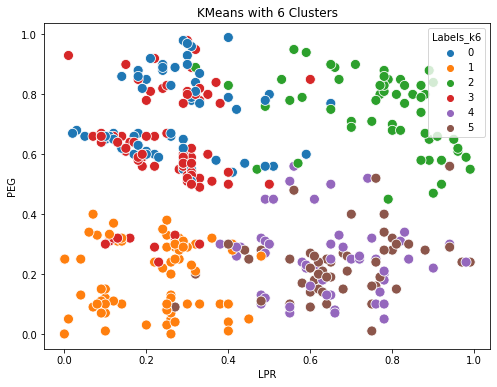

In [14]:
# 6 cluster
km4 = KMeans(n_clusters=6).fit(data0)
data['Labels_k6'] = km4.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k6'], palette=sns.color_palette('tab10', 6), s=100)# se compara LPR   y PEG
plt.title('KMeans with 6 Clusters')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


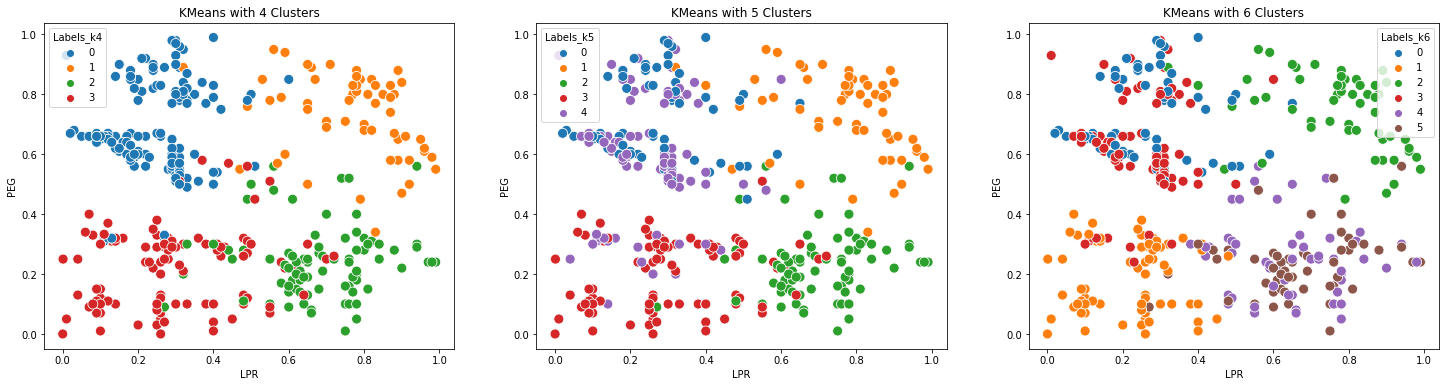

In [15]:
plt.figure(figsize=(25, 6))
plt.subplot(131)
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k4'], palette=sns.color_palette('tab10', 4), s=100)
plt.title('KMeans with 4 Clusters')
plt.subplot(132)
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k5'], palette=sns.color_palette('tab10', 5), s=100)
plt.title('KMeans with 5 Clusters')
plt.subplot(133)
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k6'], palette=sns.color_palette('tab10', 6), s=100)
plt.title('KMeans with 6 Clusters')
plt.show()

Al parecer por lo observado en los gráficos con 4, 5 y 6 clusters la mejor opción para KMEANS sería tomar 4 clusters. Para las dos variables analizadas; 1. LPR (El rendimiento en el examen del usuario para los objetos relacionados con el objeto de la meta)  y 2.PEG (El rendimiento en el examen del usuario para los objetos de la meta), tenemos el sigueinte análisis: 


*   Cluster 0: Bajo rendimiento en el examen del usuario para los objetos relacionados con el objeto de la meta, Alto rendimiento en el examen del usuario para los objetos de la meta
*   Cluster 1: Alto rendimiento en el examen del usuario para los objetos relacionados con el objeto de la meta, Alto rendimiento en el examen del usuario para los objetos de la meta
*   Cluster 2: Bajo rendimiento en el examen del usuario para los objetos relacionados con el objeto de la meta, Bajo rendimiento en el examen del usuario para los objetos de la meta
*   Cluster 3: Alto rendimiento en el examen del usuario para los objetos relacionados con el objeto de la meta, Bajo rendimiento en el examen del usuario para los objetos de la meta


# APLICANDO CLUSTER JERÁRQUICO

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


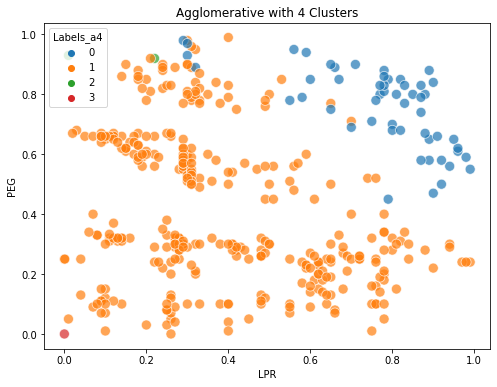

In [16]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=4, linkage='average').fit(data0)

data['Labels_a4'] = agglom.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_a4'], palette=sns.color_palette('tab10', 4), s=100, alpha=0.7)# alpha transparencia
plt.title('Agglomerative with 4 Clusters')
plt.show()

Al aplicar el algoritmo de cluster jerarquico con 4 clusters podemos concluir a simple vista para este número el KMEANS agrupa de mejor forma los datos. 

# APLICANDO DBSCAN

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


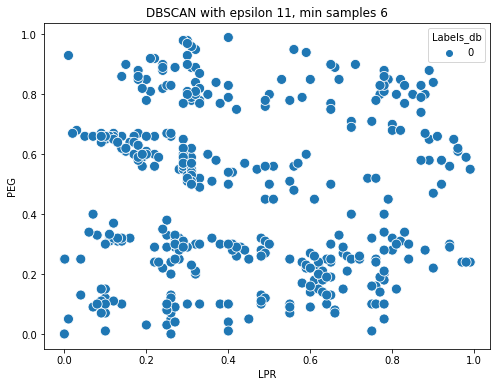

In [17]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=11, min_samples=6).fit(data0)

data['Labels_db'] = db.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_db'], palette=sns.color_palette('tab10', np.unique(db.labels_).shape[0]), s=100)
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()


Al utilizar la herramienta o algoritmo DBSCAN podemos observar que definitivamente para este conjuntode datos no espara nada  adecuado  al momento de generar clusters, inclluso variando los parámetros  Epsilon y Puntos Mínimos Epsilon elalgoritmo no es adecuado. 

Lo más probable es que DBSCAN no funcione por que la cantidad de datos es muy pequeñapara que el aplique su estructura. Loideal es que se tengan más datos oinformación.

# APLICANDO MEANSHIFT

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


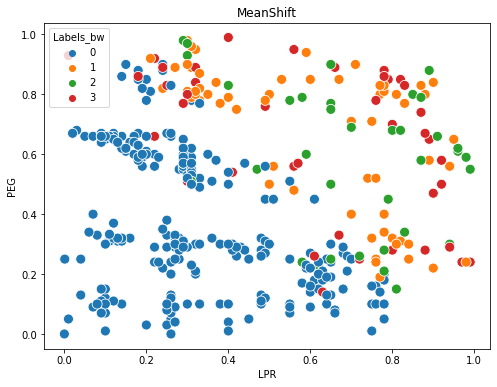

In [18]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(data0, quantile=0.0819)
ms = MeanShift(bandwidth=bandwidth).fit(data0)

data['Labels_bw'] = ms.labels_
plt.figure(figsize=(8, 6))
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_bw'], palette=sns.color_palette('tab10', np.unique(ms.labels_).shape[0]), s=100)
plt.plot()
plt.title('MeanShift')
plt.show()


Para el algoritmo MEANSHIT se verifica el quantile que nos pueda arrojar un arreglo de datos en 4 clusters, para este caso sería el quantile=0.0819. Notamos que para este tipo de datos este algoritmo tampoco es muy adecuado ya que existen mucho cruce de datos entre los distintos clusters.

In [20]:
data1=data.copy()

In [21]:
data1["UNS_Kmeans"]=data1["Labels_k4"].replace(3,4)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(1,3)
data1["UNS_Kmeans"]=data1["UNS_Kmeans"].replace(4,1)
data1["UNS_Original"]=data1["UNS"].replace(0,"Muy Bajo")
data1["UNS_Original"]=data1["UNS_Original"].replace(1,"Bajo")
data1["UNS_Original"]=data1["UNS_Original"].replace(2,"Medio")
data1["UNS_Original"]=data1["UNS_Original"].replace(3,"Alto")
data1

,STG,SCG,STR,LPR,PEG,UNS,Labels_k4,Labels_k5,Labels_k6,Labels_a4,Labels_db,Labels_bw,UNS_Kmeans,UNS_Original
0,0.00,0.10,0.50,0.26,0.05,0,3,3,1,1,0,0,1,Muy Bajo
1,0.05,0.05,0.55,0.60,0.14,1,2,2,5,1,0,0,2,Bajo
2,0.08,0.18,0.63,0.60,0.85,3,0,4,3,0,0,1,0,Alto
3,0.20,0.20,0.68,0.67,0.85,3,1,1,2,0,0,1,3,Alto
4,0.22,0.22,0.90,0.30,0.90,3,0,4,3,1,0,1,0,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0.61,0.78,0.69,0.92,0.58,3,1,1,2,0,0,3,3,Alto
399,0.78,0.61,0.71,0.19,0.60,2,0,4,3,1,0,0,0,Medio
400,0.54,0.82,0.71,0.29,0.77,3,0,4,3,1,0,3,0,Alto
401,0.50,0.75,0.81,0.61,0.26,2,2,2,5,1,0,3,2,Medio


# GRADODE PRESICIÓN Y ERRORES KMEANS

In [22]:
Niveles["NMEANS"]=np.array(data["Labels_k4"].value_counts())###INSERTAR UNA COLUMNA DE UNADTAFRAME A OTRA DE OTRA DATAFRAME

In [23]:
Niveles

,UNS,NMEANS
Low,129,133
Middle,122,121
High,102,92
very_low,50,57


In [24]:
Niveles["ERROR RELATIVO"]=(((Niveles["NMEANS"]-Niveles["UNS"])/Niveles["UNS"])*100).abs()
Niveles

,UNS,NMEANS,ERROR RELATIVO
Low,129,133,3.100775
Middle,122,121,0.819672
High,102,92,9.803922
very_low,50,57,14.000000


In [39]:
print("El error relativo promedio comparando la caracterización inicial de los datos con lo arrojado por el algoritmo KMEANS para 4 clusters es:", round(Niveles["ERROR RELATIVO"].mean(),2),"%")
print("Lo anterior implica que los resultados entregados por este algoritmo se acercan en un",100-round(Niveles["ERROR RELATIVO"].mean(),2),"% al valor real")

El error relativo promedio comparando la caracterización inicial de los datos con lo arrojado por el algoritmo KMEANS para 4 clusters es: 6.93 %
Lo anterior implica que los resultados entregados por este algoritmo se acercan en un 93.07 % al valor real


In [37]:
Accuracy=((Niveles["NMEANS"]-Niveles["UNS"]).abs()).sum()/len(data)
Precision=round((1-Accuracy)*100,2)

94.54

In [38]:
print("La precisión del algoritmo KMEANS en porcentaje equivale al:", Precision,"%")

La precisión del algoritmo KMEANS en porcentaje equivale al: 94.54 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

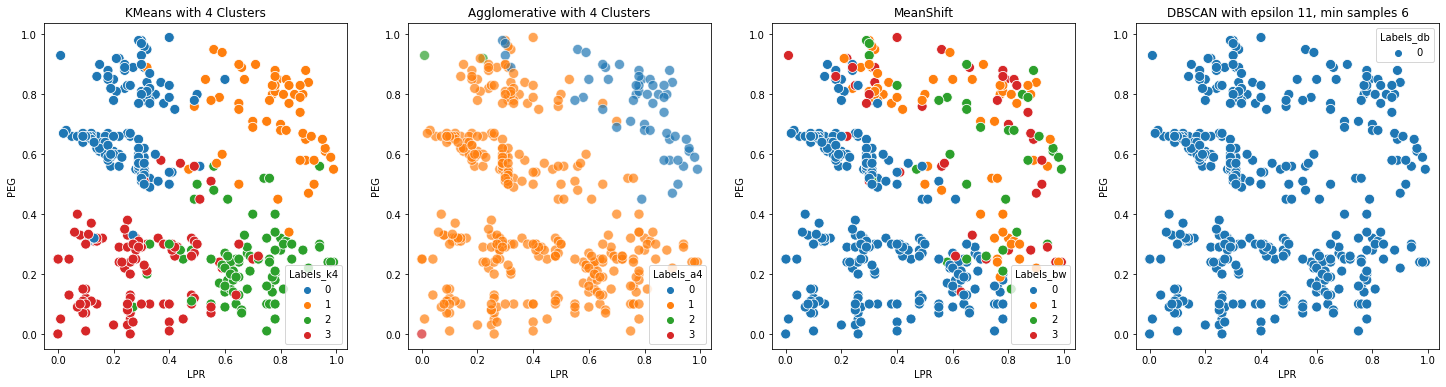

In [29]:
plt.figure(figsize=(25, 6))
plt.subplot(141)
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_k4'], palette=sns.color_palette('tab10', 4), s=100)
plt.title('KMeans with 4 Clusters')
plt.subplot(142)
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_a4'], palette=sns.color_palette('tab10', 4), s=100, alpha=0.7)# alpha transparencia
plt.title('Agglomerative with 4 Clusters')
plt.subplot(143)
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_bw'], palette=sns.color_palette('tab10', np.unique(ms.labels_).shape[0]), s=100)
plt.title('MeanShift')
plt.subplot(144)
sns.scatterplot(data['LPR'], data['PEG'], hue=data['Labels_db'], palette=sns.color_palette('tab10', np.unique(db.labels_).shape[0]), s=100)
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

In [43]:
P = {'Indicador': ['% De acercamiento', 'Precisión'],
'%': [100-round(Niveles["ERROR RELATIVO"].mean(),2), Precision]}
Pf = pd.DataFrame(P, columns=['Indicador', '%'])
Pf

,Indicador,%
0,% De acercamiento,93.07
1,Precisión,94.54


# **CONCLUSIONES**


La primera conclusión a la que se llega y de acuerdo a lo expuesto La primera conclusión a la que se llega y de acuerdo con lo expuesto anteriormente es que el mejor método de cluster para estos datos es el arrojado por medio del algoritmo KMEANS, ya que como se muestra en la figura siguiente donde se comparan los 4 métodos con 4 clusters el que menor evidencia traslapes entre puntos de clusters distintos es precisamente KMEANS..

Se establecen 2 indicadores, el primero es el porcentaje de acercamiento del método KMEANS a los datos proporcionados en la investigación en cuanto a niveles, este nos arroja un 93,07 %, ver tabla siguiente. El según indicador es el grado de precisión del algoritmo, el cual, se calcula mediante la resta de 1 menos el cociente de los valores predichos por el algoritmo sobre el total de los datos, al final se multiplica por 100, en este último se obtiene un grado de precisión del 95,54 % muy parecido al primer indicador, Ver tabla anterior.